# Linearly Seperable Data

### 1.1 Generate Linearly Seperable Data

Lets generate some linearly seperable data points. We will generate 50 points from each class. The first class will have a mean of [-1, -1] and standard deviation of 0.5. The second class will have a mean of [1, 1] and standard deviation of 0.5.

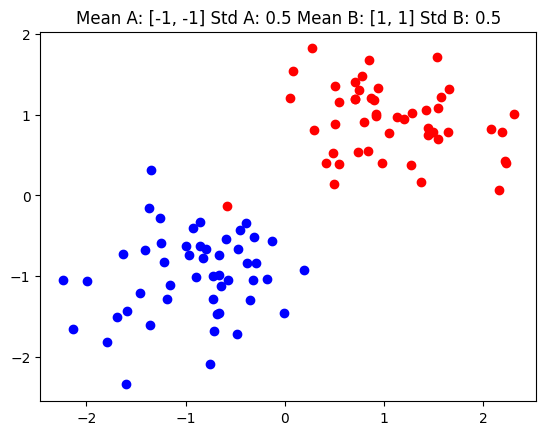

In [1]:
import data_points as dp
import numpy as np

meanA = [-1, -1]
meanB = [1, 1]
stdA = 0.5
stdB = 0.5


points1 = dp.generate_points_normal(50, meanA, stdA, 0)
points2= dp.generate_points_normal(50, meanB, stdB, 1)

points = points1 + points2

points_shuffled = dp.shuffle_points(points)
X = np.array([point[0] for point in points_shuffled])
y = np.array([point[1] for point in points_shuffled])

title = "Mean A: " + str(meanA) + " Std A: " + str(stdA) + " Mean B: " + str(meanB) + " Std B: " + str(stdB)
dp.plot_points_2d(points, title)
    

### 1.2 Perceptron Learning Algorithm

We'll do an online version of the perceptron learning algorithm for our linearly seperable data.

In [2]:
from module import SingleLayerPerceptron
losses = []
learning_rates = [0.1, 0.5, 0.01, 4, 0.001]
for lr in learning_rates:
    current = []
    for i in range(20):
        slp = SingleLayerPerceptron(2)
        current.append(slp.train(X, y, lr, method="perceptron", batch=False,  epochs=10, visualize=False))
    
    # mean of losses
    mean_loss = np.mean(current, axis=0)
    losses.append(mean_loss)
    


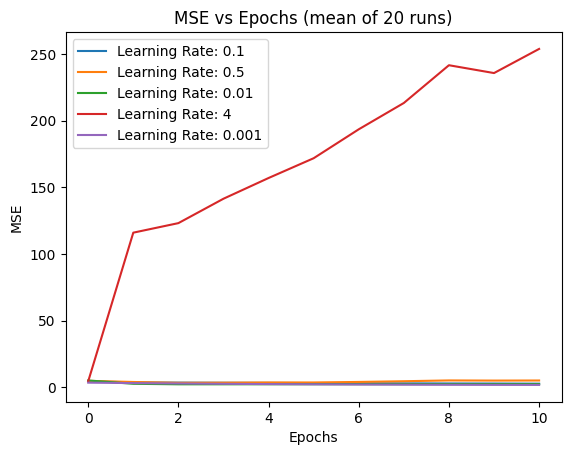

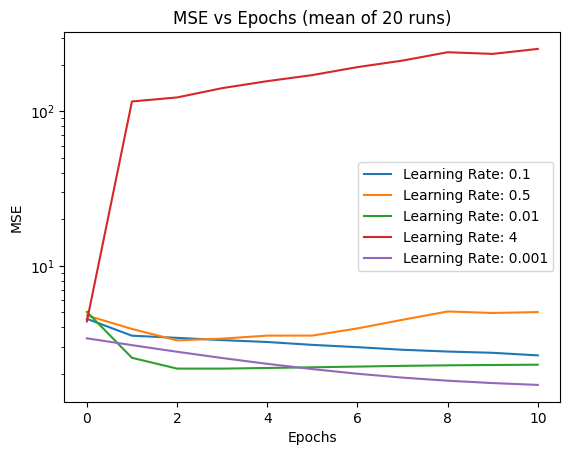

In [3]:
# plot first component of loss
from matplotlib import pyplot as plt

# loss is a list of tuples (MSE, missclassified)
for i, loss in enumerate(losses):
    plt.plot([x[0] for x in loss], label="Learning Rate: " + str(learning_rates[i]))
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE vs Epochs (mean of 20 runs)")
plt.legend()
plt.show()

# plot learning rate but with log scale
for i, loss in enumerate(losses):
    plt.plot([x[0] for x in loss], label="Learning Rate: " + str(learning_rates[i]))
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE vs Epochs (mean of 20 runs)")
plt.legend()
plt.yscale("log")
plt.show()


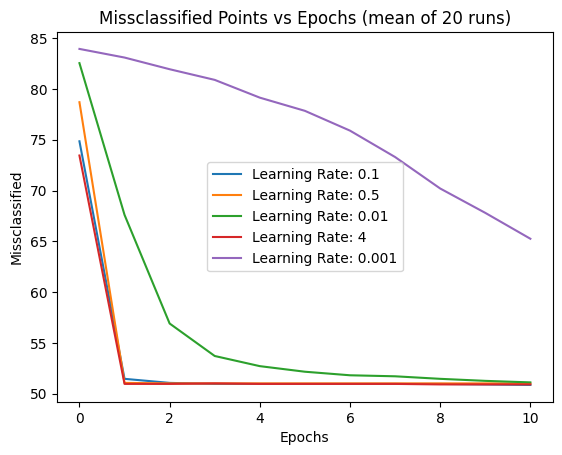

In [4]:
# plot second component of loss
for i, loss in enumerate(losses):
    plt.plot([x[1] for x in loss], label="Learning Rate: " + str(learning_rates[i]))
plt.xlabel("Epochs")
plt.ylabel("Missclassified")
plt.title("Missclassified Points vs Epochs (mean of 20 runs)")
plt.legend()
plt.show()

### 1.3 Delta Learning Rule

In [5]:
losses = []
learning_rates = [0.1, 0.5, 0.01, 0.001]
for lr in learning_rates:
    current = []
    for i in range(1):
        slp = SingleLayerPerceptron(2)
        print(slp.w)
        current.append(slp.train(X, y, lr, method="delta", batch=True,  epochs=40, visualize=False))
    
    # mean of losses
    mean_loss = np.mean(current, axis=0)
    losses.append(mean_loss)

[ 0.14757808  0.30355863 -0.36170034]
[-1.54975417 -0.88753813 -0.47057715]
[-1.47863711  0.47301024 -0.17072498]
[ 0.98996763  0.2142687  -1.53590763]


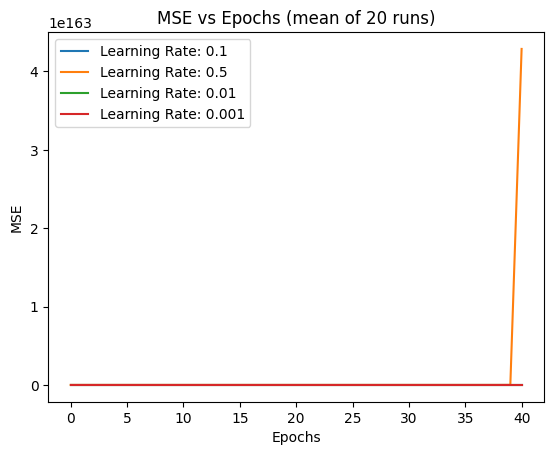

In [6]:
# plot first component of loss
from matplotlib import pyplot as plt

# loss is a list of tuples (MSE, missclassified)
for i, loss in enumerate(losses):
    plt.plot([x[0] for x in loss], label="Learning Rate: " + str(learning_rates[i]))
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE vs Epochs (mean of 20 runs)")
plt.legend()
plt.show()

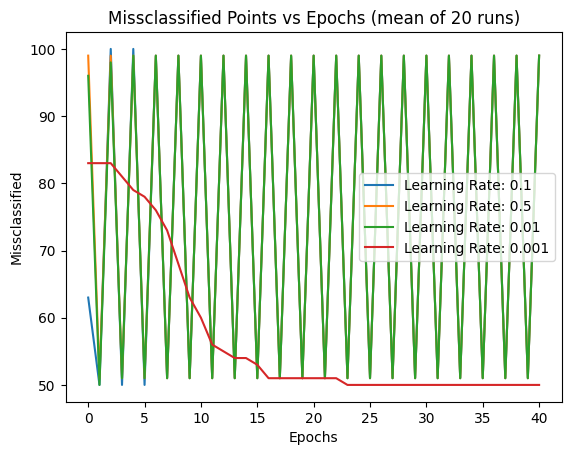

In [7]:
# plot second component of loss
for i, loss in enumerate(losses):
    plt.plot([x[1] for x in loss], label="Learning Rate: " + str(learning_rates[i]))
plt.xlabel("Epochs")
plt.ylabel("Missclassified")
plt.title("Missclassified Points vs Epochs (mean of 20 runs)")
plt.legend()
plt.show()


In [8]:
is_batch = [True, False]
losses = []

y = np.array([1 if i == 1 else -1 for i in y])

for batch in is_batch:
    lr = 0.003
    current = []
    for i in range(20):
        slp = SingleLayerPerceptron(2)
        current.append(slp.train(X, y, lr, method="delta", batch=batch,  epochs=40, visualize=False))
    
    # mean of losses
    mean_loss = np.mean(current, axis=0)
    losses.append(mean_loss)

# change y to be 1 or -1
y

array([-1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1])

0
1


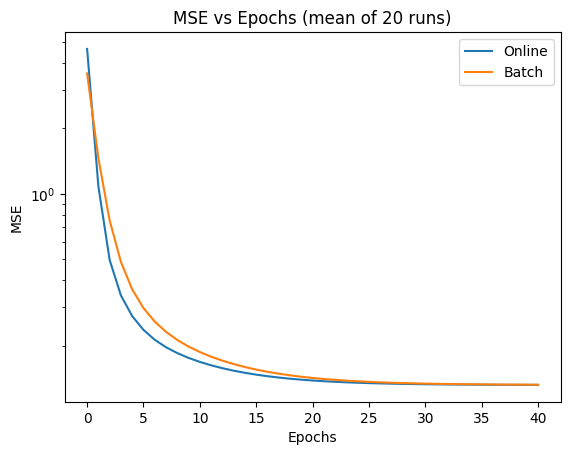

In [9]:
# plot first component of loss
from matplotlib import pyplot as plt
# undo matplotlib notebook not inline
%matplotlib inline
# loss is a list of tuples (MSE, missclassified)
for i, loss in enumerate(losses):
    print(i)
    plt.plot([x[0] for x in loss], label="Online" if is_batch[i] else "Batch")
plt.xlabel("Epochs")
plt.ylabel("MSE")
# log scale
plt.yscale("log")
plt.title("MSE vs Epochs (mean of 20 runs)")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Missclassified Points vs Epochs (mean of 20 runs)')

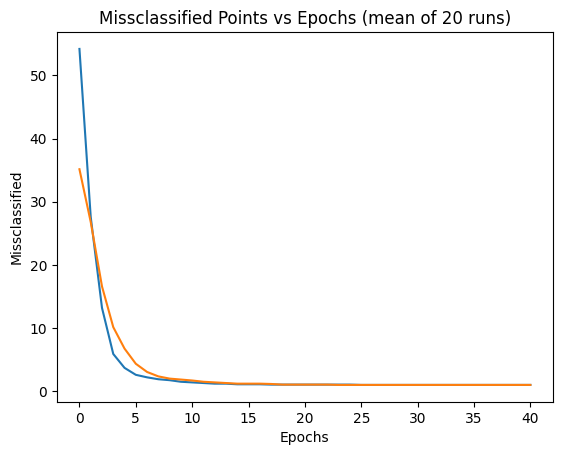

In [10]:
# plot second component of loss
for i, loss in enumerate(losses):
    plt.plot([x[1] for x in loss], label="Online" if is_batch[i] else "Batch")
plt.xlabel("Epochs")
plt.ylabel("Missclassified")
plt.title("Missclassified Points vs Epochs (mean of 20 runs)")


### 1.4 No bias impact on network

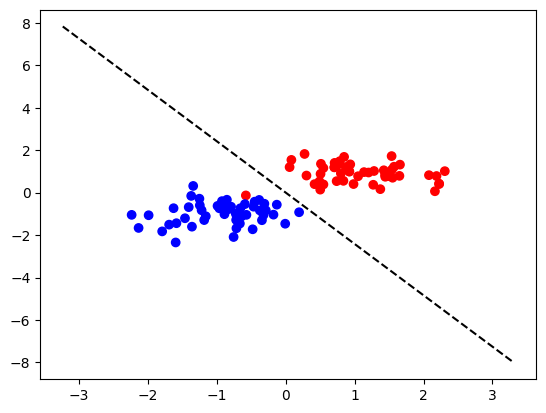

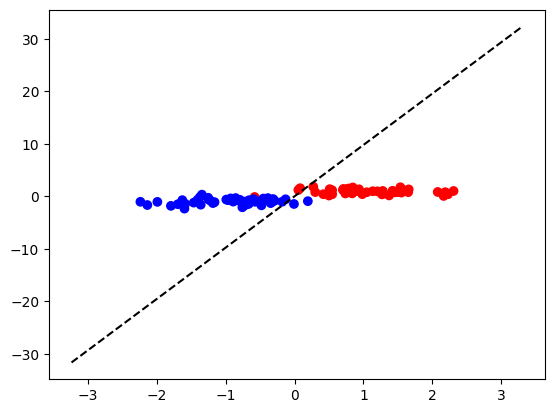

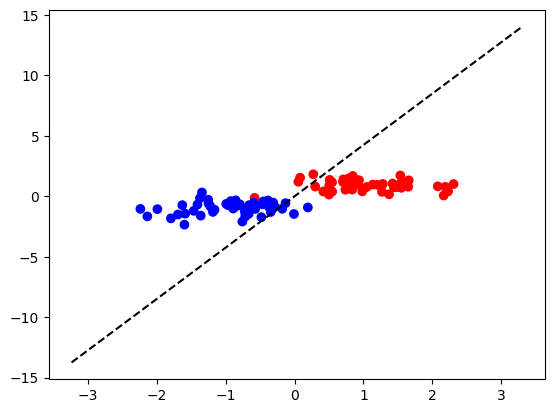

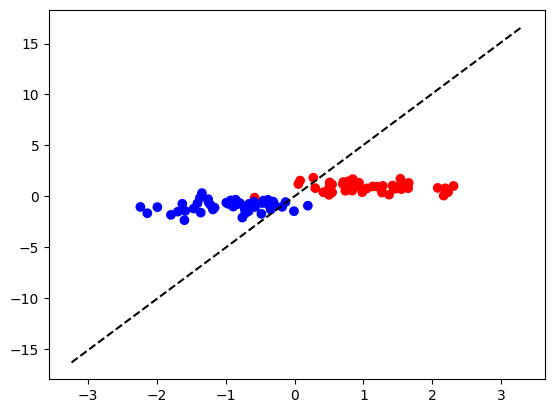

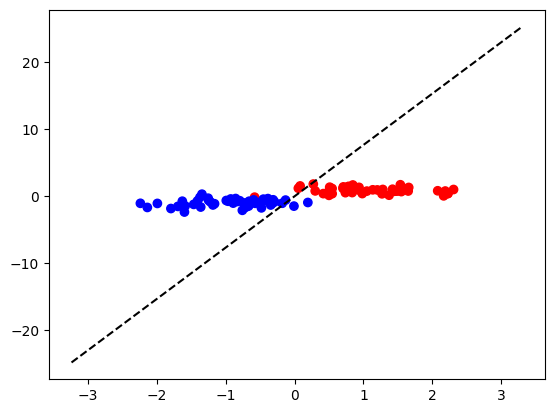

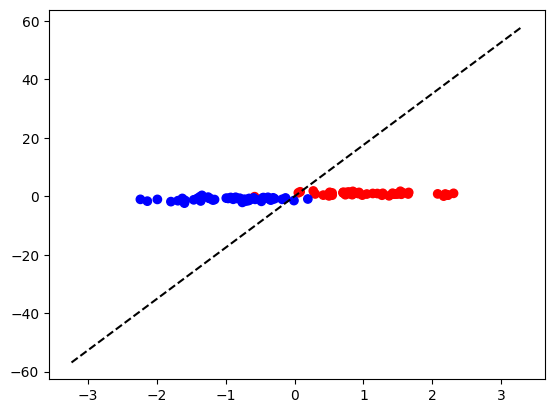

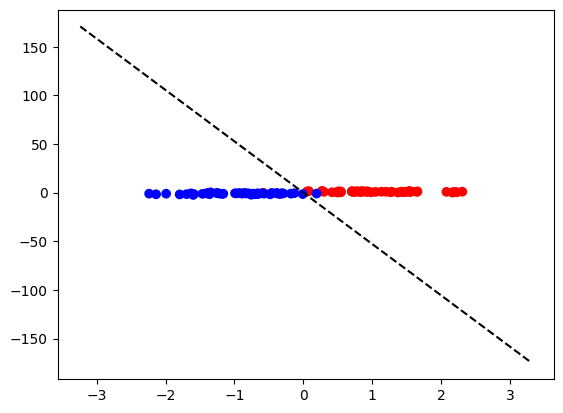

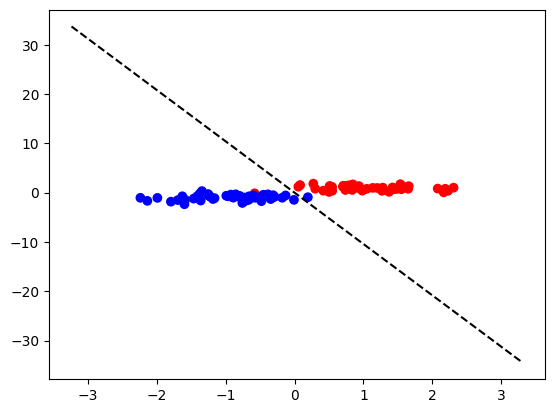

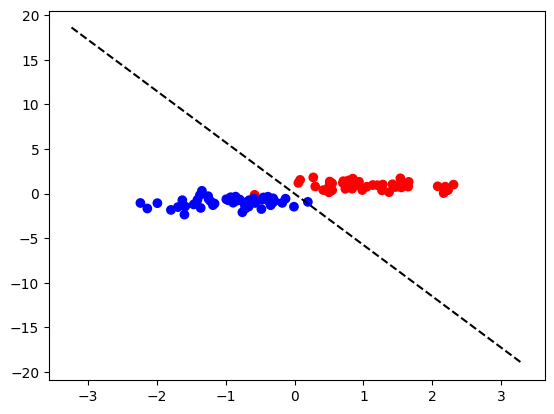

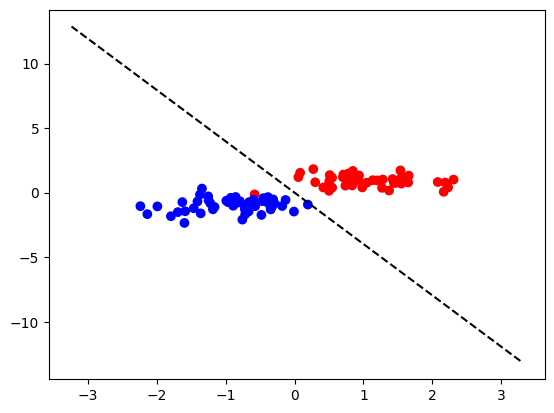

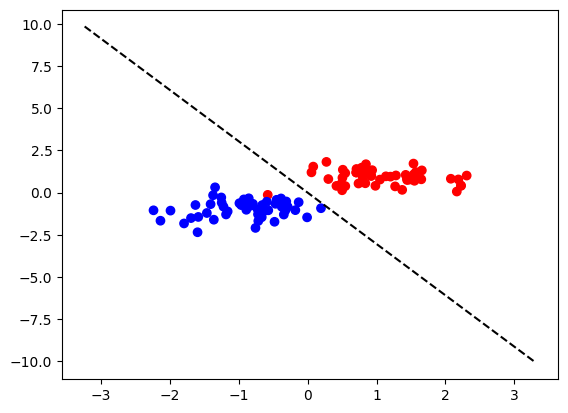

[(20.452568738537142, 1),
 (0.9164177491356453, 5),
 (0.4972294429980439, 8),
 (0.4152752751254322, 7),
 (0.3548684050658793, 5),
 (0.30738028490803887, 5),
 (0.2699956025977644, 2),
 (0.2405639079636064, 2),
 (0.21739331681112709, 2),
 (0.19915188327903313, 1),
 (0.18479101111966095, 1)]

In [12]:
# try the impact of bias
slp = SingleLayerPerceptron(2, no_bias=True)

slp.train(X, y, 0.004, method="delta", batch=True,  epochs=10, visualize=True)

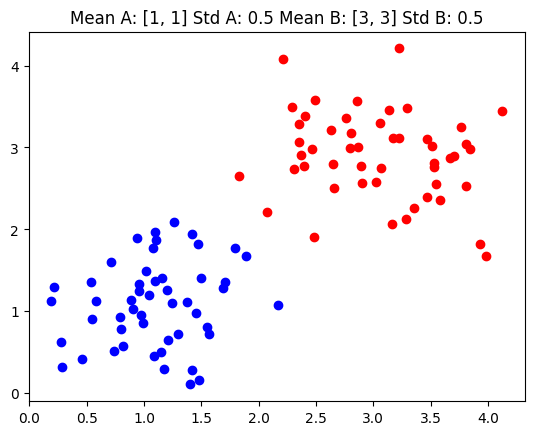

In [13]:
# generate new set of points such that they are not linearly seperable without bias
meanA = [1, 1]
meanB = [3, 3]

points1 = dp.generate_points_normal(50, meanA, stdA, 0)
points2= dp.generate_points_normal(50, meanB, stdB, 1)

points = points1 + points2

points_shuffled = dp.shuffle_points(points)

X = np.array([point[0] for point in points_shuffled])
y = np.array([point[1] for point in points_shuffled])

title = "Mean A: " + str(meanA) + " Std A: " + str(stdA) + " Mean B: " + str(meanB) + " Std B: " + str(stdB)
dp.plot_points_2d(points, title)

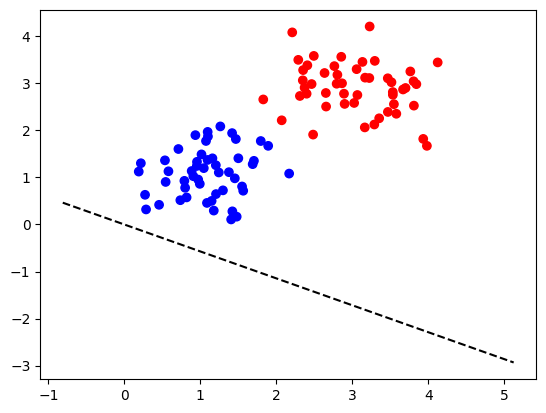

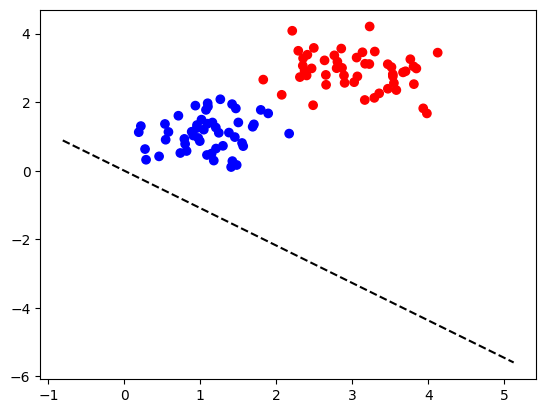

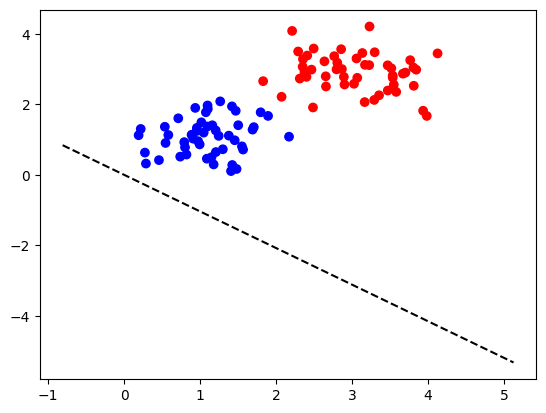

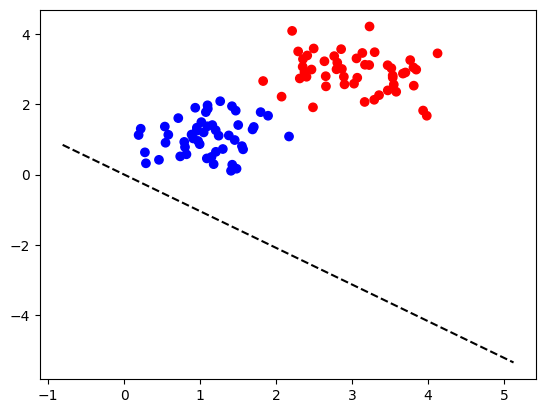

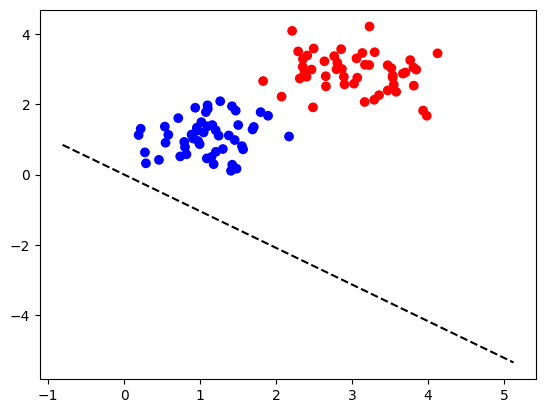

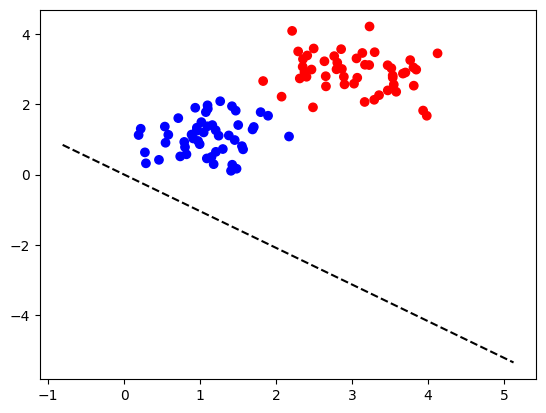

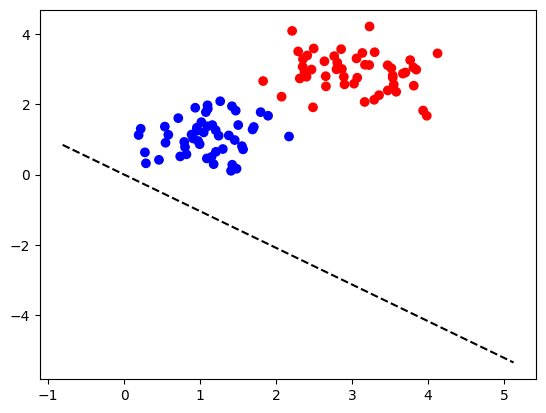

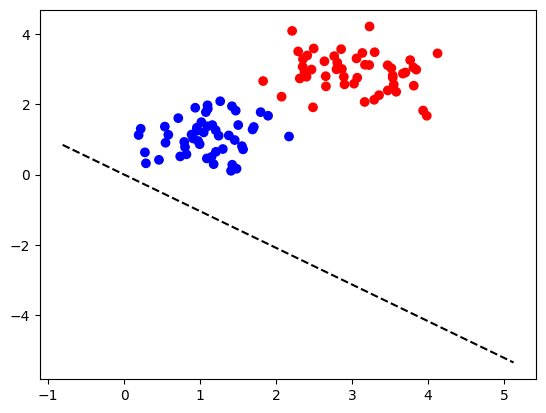

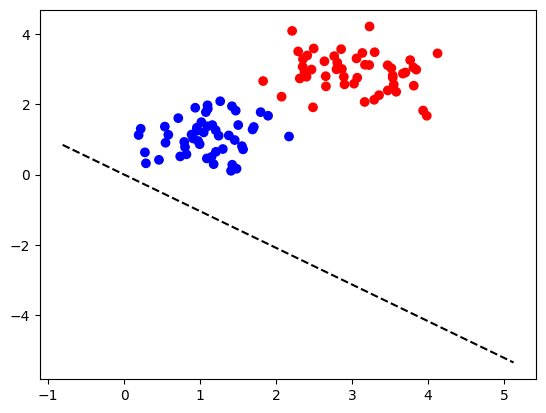

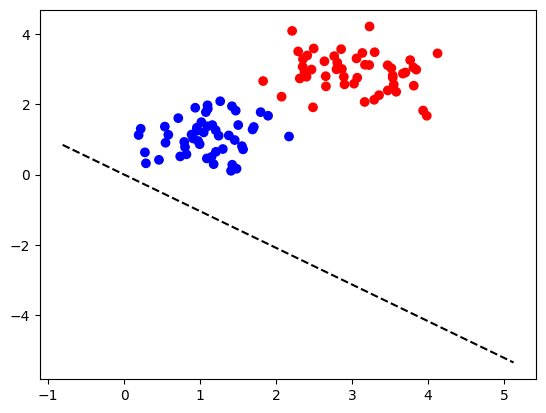

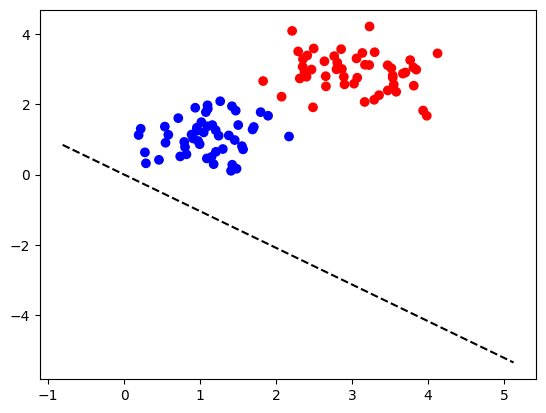

[(31.123738396137096, 50),
 (2600.717956289793, 50),
 (223895.95481745203, 50),
 (19281617.320553146, 50),
 (1660513055.0814593, 50),
 (143001682789.79218, 50),
 (12315158395277.123, 50),
 (1060568822288373.0, 50),
 (9.133510026485602e+16, 50),
 (7.865685248404433e+18, 50),
 (6.773847540272868e+20, 50)]

In [16]:
# try to train the network
# change y to be 1 or -1
y = np.array([1 if i == 1 else -1 for i in y])

slp = SingleLayerPerceptron(2, no_bias=True)
slp.train(X, y, 0.01, method="delta", batch=True,  epochs=10, visualize=True)